### ***K MEANS CLUSTERING***

### ***Importing the Libraries***

Import required libraries. Here we import the following libraries:
*   pandas - to import data
*   sklearn - scikit learn is an ML library (here it is used for K - Means Clustering)
*   matplotlib - for data and result visualizations as plots

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.cluster import KMeans as KM

### ***Importing the Dataset***

Here, the dataset is first downloaded as CSV file from the link provided and then the '.csv' file is imported. 

Then, for X variable, we consider the attributes: Sepal length and width (in cm), and Petal length and width (in cm).

In [2]:
iris_data = pd.read_csv(r"/content/Iris.csv")

X = iris_data.iloc[:, 1:-1].values

### ***To find number of Clusters (k) - Using Elbow Method***

To determine the right (optimal) number of Clusters (k - value), we use ' ***Elbow Method*** '.

Here, We graph the relationship between the number of clusters and Within Cluster Sum of Squares (***WCSS***) then we select the number of clusters where the change in WCSS begins to level off.

***(*** WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid. ***)***

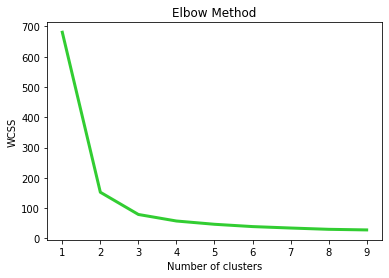

In [3]:
WCSS = []
for i in range(1, 10):
    k_means = KM(n_clusters = i, init = 'k-means++', random_state = 0)
    k_means.fit(X)
    WCSS.append(k_means.inertia_)
plt.plot(range(1, 10), WCSS, color = 'limegreen', linewidth = 3)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, we can see that the WCSS begins to level off from number of clusters of value 3, so we take ***k = 3***.

### ***K - MEANS Clustering***

We then fit K - Means algorithm to the data and predict the results.

In [4]:
k_means = KM(n_clusters = 3, init = 'k-means++', random_state = 0)
y_k_means = k_means.fit_predict(X)

### ***Visualization of K - Means Clustering Results***

The cluster results can be visualized with the help of scatter plot.

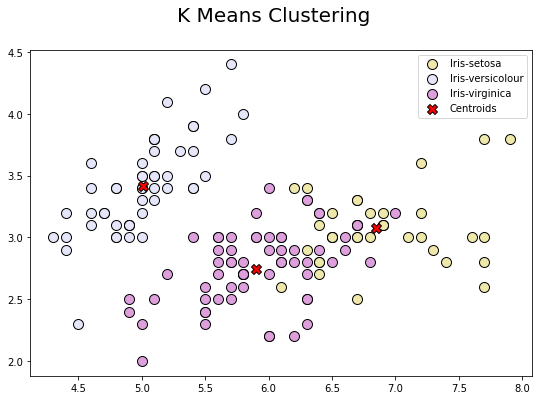

In [5]:
fig = plt.figure(figsize = (9, 6))

plt.suptitle("K Means Clustering",fontsize=20)

plt.scatter(X[y_k_means == 0, 0], X[y_k_means == 0, 1], s = 100, c = 'palegoldenrod', label = 'Iris-setosa', edgecolors = 'black')
plt.scatter(X[y_k_means == 1, 0], X[y_k_means == 1, 1], s = 100, c = 'lavender', label = 'Iris-versicolour', edgecolors = 'black')
plt.scatter(X[y_k_means == 2, 0], X[y_k_means == 2, 1], s = 100, c = 'plum', label = 'Iris-virginica', edgecolors = 'black')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids', marker = 'X', edgecolors = 'black')
plt.legend(loc = 'upper right')
plt.show()

In the plot, we can see the resulted centroids of the three species' clusters.

Using the centroid values, we can be able to predict the resulting Iris species for the given Sepal and Petal - Length and Width values.